In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

In [2]:
# Import the data from storage into a pandas dataframe
htrain = pd.read_csv("C:\Ofure\msc_training_dataset.csv")
htest= pd.read_csv("C:\Ofure\msc_testing_dataset.csv")

In [3]:
# Print the shape of the dataframes
print('Training Data:', htrain.shape)
print('Test Data:', htest.shape)

Training Data: (3000, 12)
Test Data: (999, 12)


In [4]:
htrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          3000 non-null   int64
 1   bathroom      3000 non-null   int64
 2   kitchen       3000 non-null   int64
 3   french_door   3000 non-null   int64
 4   backyard      3000 non-null   int64
 5   furnished     3000 non-null   int64
 6   green_paint   3000 non-null   int64
 7   solar_power   3000 non-null   int64
 8   woodfloor     3000 non-null   int64
 9   qlm_security  3000 non-null   int64
 10  club_access   3000 non-null   int64
 11  price         3000 non-null   int64
dtypes: int64(12)
memory usage: 281.4 KB


In [5]:
# check for missing values
htrain.isnull().sum()

room            0
bathroom        0
kitchen         0
french_door     0
backyard        0
furnished       0
green_paint     0
solar_power     0
woodfloor       0
qlm_security    0
club_access     0
price           0
dtype: int64

### Data Visualization

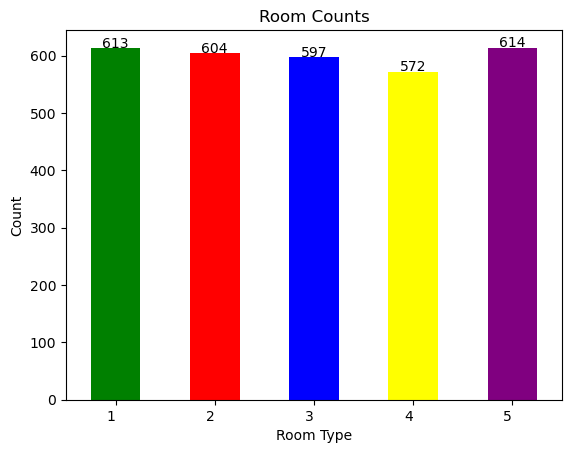

In [6]:
# Plot of property by number of rooms

plt1 = htrain['room'].value_counts().sort_index()

colors = ['green', 'red', 'blue', 'yellow', 'purple']
ax = plt1.plot(kind='bar',color = colors)

# Set the title and axis labels
ax.set_title('Room Counts')
ax.set_xlabel('Room Type')
ax.set_ylabel('Count')

# Display the count label on each bar
for i, count in enumerate(plt1):
    ax.text(i, count+1, str(count), ha='center')
    
plt.xticks(rotation=360, ha='right')

# Show the chart
plt.show()

In [7]:
htrain.describe()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2.990000,1.489000,1.522000,1.998333,0.490333,0.488667,0.485000,0.495667,0.512333,0.480667,0.499667,8606.600000
std,1.424281,0.499962,0.499599,0.813153,0.499990,0.499955,0.499858,0.500065,0.499931,0.499709,0.500083,2216.248563
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2235.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7005.000000
50%,3.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,8615.000000
75%,4.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10215.000000
max,5.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15035.000000


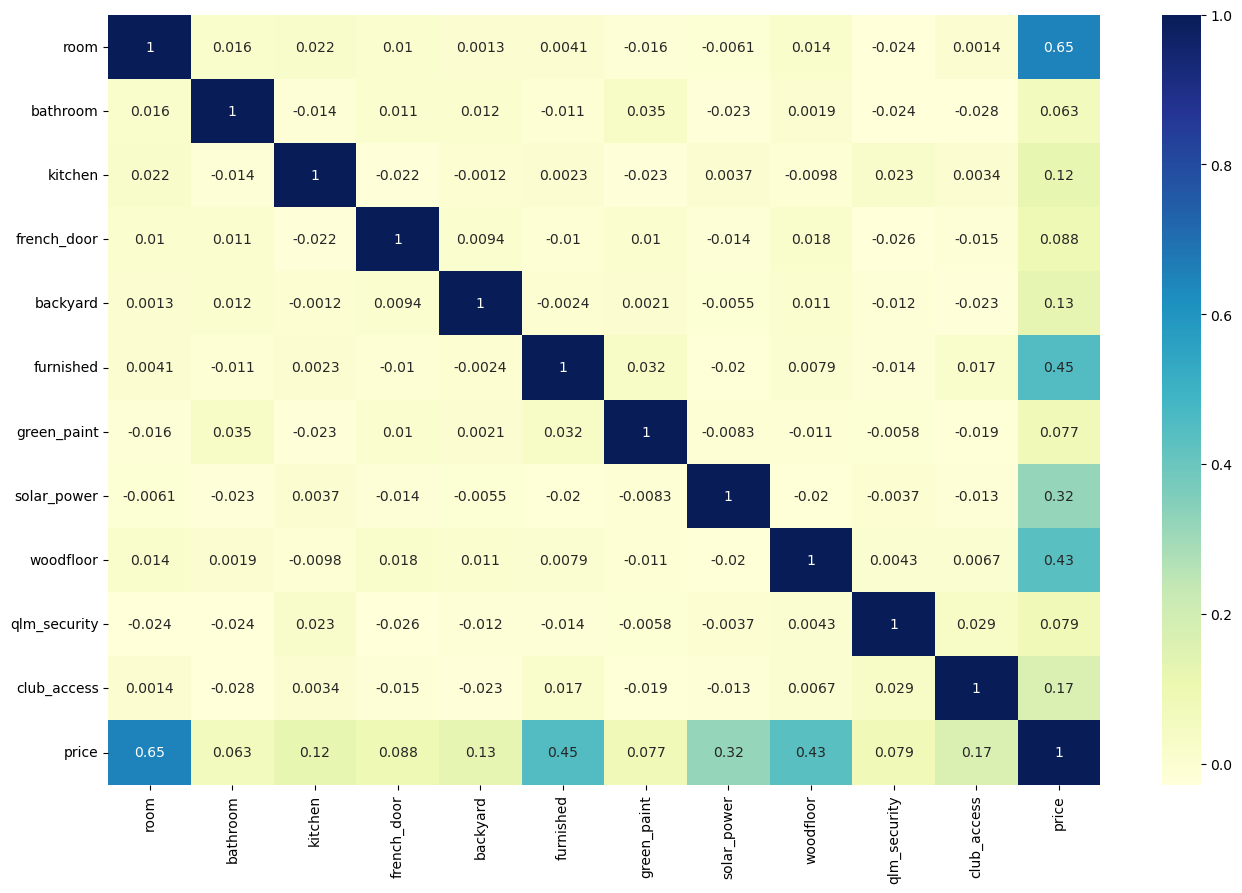

In [8]:
plt.figure(figsize = (16, 10))
sns.heatmap(htrain.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [9]:
# preprocesing of training data

X_train = htrain.drop(columns=['price'])
y_train = htrain['price']

# preprocesing of test data
X_test = htest.drop(columns=['price'])
y_test = htest['price']

# linear regression model
model = LinearRegression()

# Training model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluating model's performance on the test data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse}")
print(f"R-squared score: {r2}")

# Print intercept and coefficients
print("Intercept:", model.intercept_)
print("Coefficients:")
for i, col in enumerate(X_train.columns):
    print(f"{col}: {model.coef_[i]}")

Mean squared error: 168.99999999994918
R-squared score: 0.9999656095212318
Intercept: 195.00000000000182
Coefficients:
room: 999.9999999999995
bathroom: 300.0000000000006
kitchen: 500.00000000000074
french_door: 240.0000000000002
backyard: 559.9999999999995
furnished: 2000.0000000000002
green_paint: 369.99999999999966
solar_power: 1529.9999999999975
woodfloor: 1890.0000000000002
qlm_security: 440.0000000000004
club_access: 729.9999999999998


### Feature importance

In [10]:
coefficients = pd.Series(model.coef_, index=X_train.columns)
sorted_coeffs = coefficients.abs().sort_values(ascending=False)

# print feature rankings
print('Feature ranking:')
for i, feature in enumerate(sorted_coeffs.index):
    print(f"{i+1}. {feature}: {sorted_coeffs[feature]}")

Feature ranking:
1. furnished: 2000.0000000000002
2. woodfloor: 1890.0000000000002
3. solar_power: 1529.9999999999975
4. room: 999.9999999999995
5. club_access: 729.9999999999998
6. backyard: 559.9999999999995
7. kitchen: 500.00000000000074
8. qlm_security: 440.0000000000004
9. green_paint: 369.99999999999966
10. bathroom: 300.0000000000006
11. french_door: 240.0000000000002


In [11]:
import statsmodels.api as sm

In [12]:
# Training linear regression model using statsmodels
X_train = sm.add_constant(X_train) # add intercept to the model
model = sm.OLS(y_train, X_train)
results = model.fit()

# OLS Regression Results summary table
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.828e+31
Date:                Sun, 07 May 2023   Prob (F-statistic):               0.00
Time:                        18:22:20   Log-Likelihood:                 72201.
No. Observations:                3000   AIC:                        -1.444e+05
Df Residuals:                    2988   BIC:                        -1.443e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          195.0000   9.49e-13   2.05e+14   

In [13]:
# Estimating Sales Price of the houses

htest['Estimated_Price'] = y_pred
print(htest[['Estimated_Price']])

     Estimated_Price
0             5055.0
1             7645.0
2            11305.0
3             8845.0
4            11165.0
..               ...
994          10075.0
995           9775.0
996           9375.0
997           8515.0
998           6105.0

[999 rows x 1 columns]


In [14]:
htest

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price,Estimated_Price
0,1,1,1,3,0,0,1,1,0,1,0,5068,5055.0
1,5,1,1,2,0,0,0,0,0,1,1,7658,7645.0
2,5,1,1,3,0,0,0,1,1,1,1,11318,11305.0
3,4,2,2,1,0,1,1,0,0,1,0,8858,8845.0
4,5,2,1,1,0,1,1,1,0,0,1,11178,11165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,5,2,2,3,1,1,0,0,0,0,0,10088,10075.0
995,5,1,2,3,1,1,0,0,0,0,0,9788,9775.0
996,3,2,2,1,0,1,1,1,0,1,0,9388,9375.0
997,3,2,1,1,1,0,0,1,1,0,0,8528,8515.0


In [15]:
htest[['Estimated_Price']].to_csv('estimated_prices.csv', index=True)

### Random Forest Regression

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
h_train = pd.read_csv("C:\Ofure\msc_training_dataset.csv")
h_test= pd.read_csv("C:\Ofure\msc_testing_dataset.csv")

In [18]:
X_train2 = h_train.drop(columns=['price'])
y_train2 = h_train['price']
X_test2 = h_test.drop(columns=['price'])
y_test2 = h_test['price']

# create Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

# train model on training data
rf_model.fit(X_train2, y_train2)

# predict on test data
y_pred2 = rf_model.predict(X_test2)

# evaluate model performance
mse = mean_squared_error(y_test2, y_pred2)
r2 = r2_score(y_test2, y_pred2)

print(f"Mean squared error: {mse}")
print(f"R-squared score: {r2}")

Mean squared error: 428667.81982660625
R-squared score: 0.912768689015769


### Feature Importance

In [19]:
importances = rf_model.feature_importances_
feature_names = X_train2.columns
sorted_idx = importances.argsort()[::-1]

print('Feature ranking:')
for i in sorted_idx:
    print(f"{feature_names[i]}: {importances[i]}")

Feature ranking:
room: 0.4546956745747291
furnished: 0.21920739316565063
woodfloor: 0.1977003536297644
solar_power: 0.12771954414229963
club_access: 0.0005278109701854309
qlm_security: 0.00011716398980211781
kitchen: 1.716671983876121e-05
french_door: 1.4892807730037021e-05
green_paint: 0.0
backyard: 0.0
bathroom: 0.0


In [20]:
h_test['Estimated_Price2'] = y_pred2
print(h_test[['Estimated_Price2']])

     Estimated_Price2
0         5708.410957
1         7809.410348
2        11346.739675
3         8947.999016
4        11363.220368
..                ...
994       9890.023069
995       9890.023069
996       9289.963246
997       9272.645369
998       7231.922255

[999 rows x 1 columns]


In [21]:
h_test[['Estimated_Price2']].to_csv('estimated_prices2.csv', index=True)

In [22]:
h_test

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price,Estimated_Price2
0,1,1,1,3,0,0,1,1,0,1,0,5068,5708.410957
1,5,1,1,2,0,0,0,0,0,1,1,7658,7809.410348
2,5,1,1,3,0,0,0,1,1,1,1,11318,11346.739675
3,4,2,2,1,0,1,1,0,0,1,0,8858,8947.999016
4,5,2,1,1,0,1,1,1,0,0,1,11178,11363.220368
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,5,2,2,3,1,1,0,0,0,0,0,10088,9890.023069
995,5,1,2,3,1,1,0,0,0,0,0,9788,9890.023069
996,3,2,2,1,0,1,1,1,0,1,0,9388,9289.963246
997,3,2,1,1,1,0,0,1,1,0,0,8528,9272.645369
